In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean, nice plots
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Load cleaned datasets from the processed folder
patients = pd.read_csv('../data/processed/patients_clean.csv')
subscribers = pd.read_csv('../data/processed/subscribers_clean.csv')
claims = pd.read_csv('../data/processed/claims_clean.csv')
diseases = pd.read_csv('../data/processed/diseases_clean.csv')
groups = pd.read_csv('../data/processed/groups_clean.csv')
subgroups = pd.read_csv('../data/processed/subgroups_clean.csv')


In [3]:
# Show number of rows and columns in each dataset
datasets = {
    "Patients": patients,
    "Subscribers": subscribers,
    "Claims": claims,
    "Diseases": diseases,
    "Groups": groups,
    "Subgroups": subgroups
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} rows × {df.shape[1]} columns")


Patients: 70 rows × 8 columns
Subscribers: 100 rows × 14 columns
Claims: 70 rows × 8 columns
Diseases: 59 rows × 3 columns
Groups: 57 rows × 8 columns
Subgroups: 9 rows × 4 columns


In [4]:
# Show the first few rows of patient data
patients.head()


,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id
0,187158,Harbir,Female,1924-06-30,+91 0112009318,Galactosemia,Rourkela,H1001
1,112766,Brahmdev,Female,1948-12-20,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016
2,199252,Ujjawal,Male,1980-04-16,+91 8547451606,Kidney cancer,Berhampur,H1009
3,133424,Ballari,Female,1969-09-25,+91 0106026841,Suicide,Bihar Sharif,H1017
4,172579,Devnath,Female,1946-05-01,+91 1868774631,Food allergy,Bidhannagar,H1019


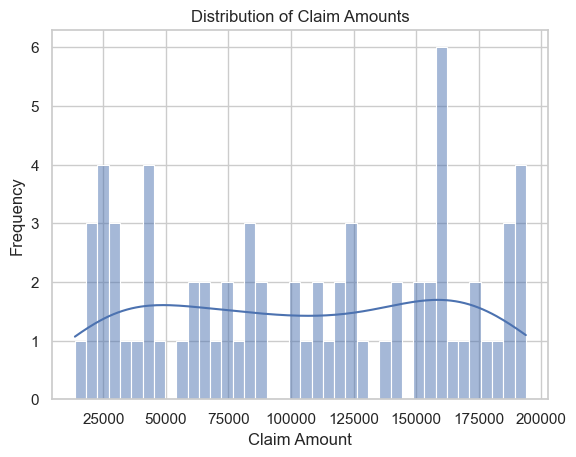

In [5]:
if 'claim_amount' in claims.columns:
    sns.histplot(claims['claim_amount'], bins=40, kde=True)
    plt.title("Distribution of Claim Amounts")
    plt.xlabel("Claim Amount")
    plt.ylabel("Frequency")
    plt.show()


In [7]:
# Top 10 diseases
if 'disease_name' in diseases.columns:
    top_diseases = diseases['disease_name'].value_counts().head(10)
    sns.barplot(x=top_diseases.values, y=top_diseases.index)
    plt.title("Top 10 Reported Diseases")
    plt.xlabel("Frequency")
    plt.ylabel("Disease")
    plt.show()


In [8]:
# Top 10 hospitals by number of claims
if 'hospital_id' in claims.columns:
    top_hospitals = claims['hospital_id'].value_counts().head(10)
    sns.barplot(x=top_hospitals.values, y=top_hospitals.index)
    plt.title("Top 10 Hospitals by Number of Claims")
    plt.xlabel("Number of Claims")
    plt.ylabel("Hospital ID")
    plt.show()


In [10]:
# Check if there's a subscriber ID in claims
if 'subscriber_id' in claims.columns:
    top_subscribers = claims['subscriber_id'].value_counts().head(10)
    sns.barplot(x=top_subscribers.values, y=top_subscribers.index)
    plt.title("Top 10 Subscribers by Number of Claims")
    plt.xlabel("Number of Claims")
    plt.ylabel("Subscriber ID")
    plt.show()


In [11]:
# Make sure claim_amount and hospital_id exist
if 'hospital_id' in claims.columns and 'claim_amount' in claims.columns:
    avg_claims = claims.groupby('hospital_id')['claim_amount'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_claims.values, y=avg_claims.index)
    plt.title("Top 10 Hospitals by Average Claim Amount")
    plt.xlabel("Average Claim Amount")
    plt.ylabel("Hospital ID")
    plt.show()


In [ ]:
# Top diseases by frequency
if 'disease_name' in diseases.columns:
    top_diseases = diseases['disease_name'].value_counts().head(10)
    sns.barplot(x=top_diseases.values, y=top_diseases.index)
    plt.title("Top 10 Diseases Reported")
    plt.xlabel("Frequency")
    plt.ylabel("Disease Name")
    plt.show()


In [ ]:
# Merge patients and claims by patient ID (adjust if different column names)
if 'patient_id' in patients.columns and 'patient_id' in claims.columns:
    merged = pd.merge(claims, patients, on='patient_id', how='inner')
    if 'age' in merged.columns and 'claim_amount' in merged.columns:
        sns.scatterplot(data=merged, x='age', y='claim_amount')
        plt.title("Claim Amount vs Age")
        plt.xlabel("Age")
        plt.ylabel("Claim Amount")
        plt.show()
